## Caution!! In case of immediate use, the model has already been trained and can be loaded and run instantly

# Problem Statement (Multi-label classification)

## Create a model for  performing the presumptive diagnosis of two diseases of urinary system: acute inflammations of urinary bladder and acute nephritises.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_excel('UrineDiagonsisData.xlsx',header=None)

In [27]:
df.head(8)

,0,1,2,3,4,5,6,7,8,9
0,"35,5",no,yes,no,no,no,no,no,NaN,"For example, '35,9 no no yes yes yes yes no'"
1,"35,9",no,no,yes,yes,yes,yes,no,NaN,Where:
2,"35,9",no,yes,no,no,no,no,no,NaN,"'35,9' Temperature of patient"
3,"36,0",no,no,yes,yes,yes,yes,no,NaN,'no' Occurrence of nausea
4,"36,0",no,yes,no,no,no,no,no,NaN,'no' Lumbar pain
5,"36,0",no,yes,no,no,no,no,no,NaN,'yes' Urine pushing (continuous need for urina...
6,"36,2",no,no,yes,yes,yes,yes,no,NaN,'yes' Micturition pains
7,"36,2",no,yes,no,no,no,no,no,NaN,"'yes' Burning of urethra, itch, swelling of ur..."


In [28]:
df=df.rename(columns={0:"Temperature",1:"Occurrence of nausea",2:"Lumbar pain",3:"Urine pushing",4:"Micturition pains",5:"Burning of urethra, itch, swelling of urethra outlet",6:"Inflammation of urinary bladder",7:"Nephritis of renal pelvis origin"})

In [29]:
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin,8,9
0,"35,5",no,yes,no,no,no,no,no,NaN,"For example, '35,9 no no yes yes yes yes no'"
1,"35,9",no,no,yes,yes,yes,yes,no,NaN,Where:
2,"35,9",no,yes,no,no,no,no,no,NaN,"'35,9' Temperature of patient"
3,"36,0",no,no,yes,yes,yes,yes,no,NaN,'no' Occurrence of nausea
4,"36,0",no,yes,no,no,no,no,no,NaN,'no' Lumbar pain


In [30]:
# As mentioned we do not need these two columns
df=df.drop([8,9], axis=1)

In [31]:
df.shape

(120, 8)

In [32]:
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [33]:
df.shape

(120, 8)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Temperature                                           120 non-null    object
 1   Occurrence of nausea                                  120 non-null    object
 2   Lumbar pain                                           120 non-null    object
 3   Urine pushing                                         120 non-null    object
 4   Micturition pains                                     120 non-null    object
 5   Burning of urethra, itch, swelling of urethra outlet  120 non-null    object
 6   Inflammation of urinary bladder                       120 non-null    object
 7   Nephritis of renal pelvis origin                      120 non-null    object
dtypes: object(8)
memory usage: 7.6+ KB


In [35]:
def modify_temp(x):
    return int(x.split(",")[0])+0.1*int(x.split(",")[1])

In [36]:
df["Temperature"]=df["Temperature"].apply(modify_temp)

In [37]:
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,120.0,38.724167,1.819132,35.5,37.1,37.95,40.6,41.5


## Feature Engineering

### Checking for null values

In [39]:
df.isnull().sum()

Temperature                                             0
Occurrence of nausea                                    0
Lumbar pain                                             0
Urine pushing                                           0
Micturition pains                                       0
Burning of urethra, itch, swelling of urethra outlet    0
Inflammation of urinary bladder                         0
Nephritis of renal pelvis origin                        0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [40]:
df["Nephritis of renal pelvis origin"].value_counts()

no     70
yes    50
Name: Nephritis of renal pelvis origin, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

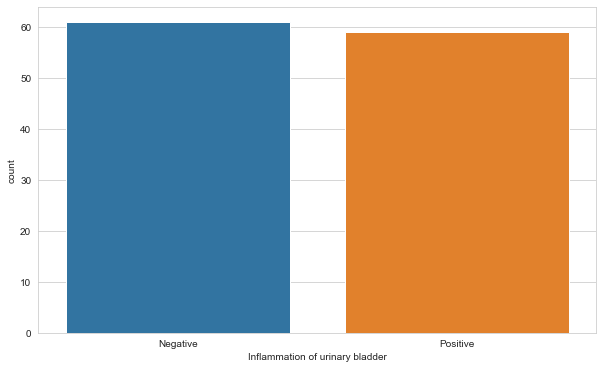

In [41]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Inflammation of urinary bladder",data=df)
plot.set_xticklabels(["Negative","Positive"])

In [42]:
df["Inflammation of urinary bladder"].value_counts()

no     61
yes    59
Name: Inflammation of urinary bladder, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

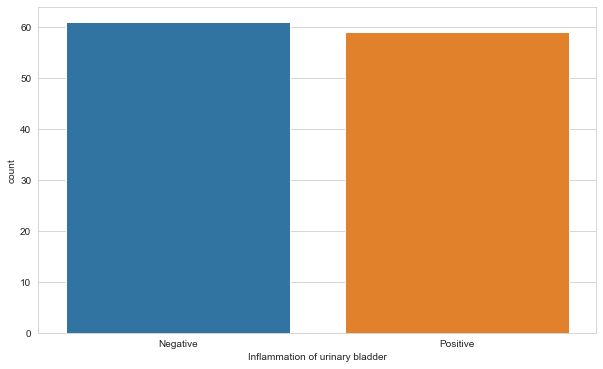

In [43]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Inflammation of urinary bladder",data=df)
plot.set_xticklabels(["Negative","Positive"])

#### Nicely Balanced

### Handling Categorical Data

One of the many ways to handle categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [44]:
df.columns

Index(['Temperature', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing',
       'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet',
       'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'],
      dtype='object')

In [45]:
# As Occurrence of nausea  is  a Nominal Categorical data we will perform OneHotEncoding

Nausea= df[['Occurrence of nausea']]
Nausea= pd.get_dummies(Nausea, drop_first= True)

# As Occurrence of Lumbar pain  is  a Nominal Categorical data we will perform OneHotEncoding
LumbarPain=df[['Lumbar pain']]
LumbarPain= pd.get_dummies(LumbarPain, drop_first= True)

# As Occurrence of Urine pushing is  a Nominal Categorical data we will perform OneHotEncoding
UrinePushing=df[['Urine pushing']]
UrinePushing= pd.get_dummies(UrinePushing, drop_first= True)

# As Occurrence of Micturition pains is  a Nominal Categorical data we will perform OneHotEncoding
MicturitionPains=df[['Micturition pains']]
MicturitionPains= pd.get_dummies(MicturitionPains, drop_first= True)


# As Occurrence of Burning of urethra is  a Nominal Categorical data we will perform OneHotEncoding
BurningUrethra=df[['Burning of urethra, itch, swelling of urethra outlet']]
BurningUrethra= pd.get_dummies(BurningUrethra, drop_first= True)


# As Occurrence of Nephritis of renal pelvis origin is  an Ordinal Categorical data with respect to this data we will perform OneHotEncoding
df['Nephritis of renal pelvis origin'].replace({"yes": 1, "no": 0}, inplace = True)

# As Occurrence of Inflammation of urinary bladder is  an Ordinal Categorical data with respect to this data we will perform OneHotEncoding
df['Inflammation of urinary bladder'].replace({"yes": 1, "no": 0}, inplace = True)
                                                                                    


In [46]:
### Concatenating these new data frames
df = pd.concat([df, Nausea, LumbarPain, UrinePushing,MicturitionPains,BurningUrethra], axis = 1)

In [47]:
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin,Occurrence of nausea_yes,Lumbar pain_yes,Urine pushing_yes,Micturition pains_yes,"Burning of urethra, itch, swelling of urethra outlet_yes"
0,35.5,no,yes,no,no,no,0,0,0,1,0,0,0
1,35.9,no,no,yes,yes,yes,1,0,0,0,1,1,1
2,35.9,no,yes,no,no,no,0,0,0,1,0,0,0
3,36.0,no,no,yes,yes,yes,1,0,0,0,1,1,1
4,36.0,no,yes,no,no,no,0,0,0,1,0,0,0


In [48]:
df.drop(['Occurrence of nausea', 'Lumbar pain', 'Urine pushing',
       'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet'], axis = 1, inplace = True)

In [49]:
df.head()

,Temperature,Inflammation of urinary bladder,Nephritis of renal pelvis origin,Occurrence of nausea_yes,Lumbar pain_yes,Urine pushing_yes,Micturition pains_yes,"Burning of urethra, itch, swelling of urethra outlet_yes"
0,35.5,0,0,0,1,0,0,0
1,35.9,1,0,0,0,1,1,1
2,35.9,0,0,0,1,0,0,0
3,36.0,1,0,0,0,1,1,1
4,36.0,0,0,0,1,0,0,0


#### Checking for outliers

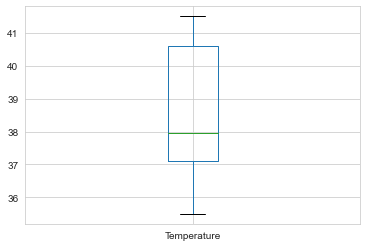

In [50]:
#temperature
df.boxplot(column='Temperature')

## Feature Selection

#### Using Filter method ( X-Square technique)

In [51]:
df.columns

Index(['Temperature', 'Inflammation of urinary bladder',
       'Nephritis of renal pelvis origin', 'Occurrence of nausea_yes',
       'Lumbar pain_yes', 'Urine pushing_yes', 'Micturition pains_yes',
       'Burning of urethra, itch, swelling of urethra outlet_yes'],
      dtype='object')

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['Occurrence of nausea_yes', 'Lumbar pain_yes',
       'Urine pushing_yes', 'Micturition pains_yes',
       'Burning of urethra, itch, swelling of urethra outlet_yes']]  #independent columns
y = df['Nephritis of renal pelvis origin']   #target column

In [56]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [57]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [58]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [59]:
featureScores

,Specs,Score,P-Values
0,Occurrence of nausea_yes,40.600000,1.868067e-10
1,Lumbar pain_yes,25.510204,4.400494e-07
2,Urine pushing_yes,2.285714,1.305700e-01
3,Micturition pains_yes,1.360291,2.434871e-01
4,"Burning of urethra, itch, swelling of urethra ...",6.914286,8.550979e-03


#### Each one of them show association with the O/p variable at 95% level of significance

## Model Selection

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Temperature                                               120 non-null    float64
 1   Inflammation of urinary bladder                           120 non-null    int64  
 2   Nephritis of renal pelvis origin                          120 non-null    int64  
 3   Occurrence of nausea_yes                                  120 non-null    uint8  
 4   Lumbar pain_yes                                           120 non-null    uint8  
 5   Urine pushing_yes                                         120 non-null    uint8  
 6   Micturition pains_yes                                     120 non-null    uint8  
 7   Burning of urethra, itch, swelling of urethra outlet_yes  120 non-null    uint8  
dtypes: float64(1), int64(

In [107]:
x=df[["Temperature",'Occurrence of nausea_yes', 'Lumbar pain_yes',
       'Urine pushing_yes', 'Micturition pains_yes',
       'Burning of urethra, itch, swelling of urethra outlet_yes']]
y = df[['Nephritis of renal pelvis origin','Inflammation of urinary bladder']]

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101,test_size=0.6)

In [140]:
x_train.shape

(48, 6)

In [141]:
x_test.shape

(72, 6)

In [142]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

x_train[["Temperature"]] = standardScaler.fit_transform(x_train[["Temperature"]])

x_test[["Temperature"]]= standardScaler.transform(x_test[["Temperature"]])

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping



In [149]:
model =Sequential()
# model.add(Dense(30, input_dim=6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.5))

#Multi non exclusive class classification
model.add(Dense(2,activation="sigmoid"))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")

In [150]:
import tensorflow
from IPython.display import clear_output
class PlotLearning(tensorflow.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [151]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [152]:
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

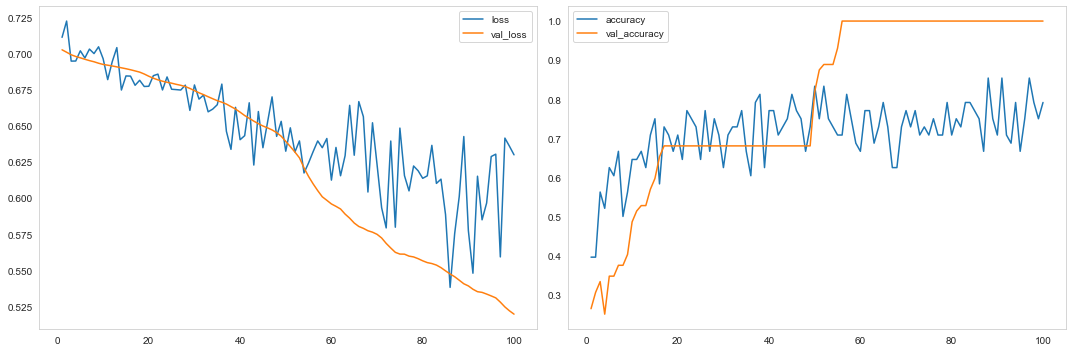

In [153]:
model.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stop,PlotLearning()],batch_size=15)

In [169]:
#Saving the scaler to disk
import pickle
pickle.dump(standardScaler, open('urinaryDisorderScaler.pkl', 'wb'))

### Saving the model

In [155]:
model.save("modela100t0.6bs15.h5")
print("Saved model to disk")

Saved model to disk


## Run the model from here

### Loading the model

In [156]:
from tensorflow.keras.models import load_model
a = load_model("modela100t0.6bs15.h5")
# summarize model.
a.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 15)                105       
_________________________________________________________________
dropout_24 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_25 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 80        
_________________________________________________________________
dropout_26 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                

In [157]:
x_test.shape

(72, 6)

### Doing some random prediction  from the test data set

In [166]:
x_test.iloc[65:66]

,Temperature,Occurrence of nausea_yes,Lumbar pain_yes,Urine pushing_yes,Micturition pains_yes,"Burning of urethra, itch, swelling of urethra outlet_yes"
24,-0.935599,0,0,1,1,1


In [167]:
y_test.iloc[65:66]

,Nephritis of renal pelvis origin,Inflammation of urinary bladder
24,0,1


In [168]:
yhat = a.predict(np.asarray(x_test.iloc[65:66].to_numpy()))
print('Predicted: %s' % yhat[0])

Predicted: [0.4188104 0.6222454]


In [ ]:
if (yhat[0]>0.5 and yhat[1]>0.5):
    print("Inflammation of urinary bladder as well as nephritis of renal pelvis origin detected")
elif (yhat[0]>0.5):
    print("Inflammation of urinary bladder detected")
elif(yhat[1]>0.5):
    print("nephritis of renal pelvis origin detected")
else:
    print("No issue detected")